# What is a class

In [2]:
#Classes are python structures, that are very useful for packaging up code!

In [12]:
# Base class
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def __repr__(self):
        return f"Person(name={self.name}, age={self.age})"

    def my_function(self, a=5):
        return a**2

# Example usage
person = Person("John Doe", 30)
person2 = Person("Jane Fonda", 90)
print(person)


Person(name=John Doe, age=30)


In [13]:
person.my_function(a=10)

100

### We can write classes that extend existing classes

In [14]:
# Subclass that extends the Person class
class Student(Person):
    def __init__(self, name, age, subjects):
        # Initialize the base class (Person)
        super().__init__(name, age)
        # Initialize the additional attribute 'subjects'
        self.subjects = subjects

    def __repr__(self):
        return f"Student(name={self.name}, age={self.age}, subjects={self.subjects})"


In [15]:
student = Student("Jane Doe", 20, ["Math", "Physics", "Biology"])
print(student)

Student(name=Jane Doe, age=20, subjects=['Math', 'Physics', 'Biology'])


# Exercise

1. Write a class called 'dataGeneratorandPlotter'. This class should have the following methods:
   - generate_data: it will generate some data X,Y and store that data in an attribute called data_X, and data_Y.
   - plot_data: it will plot the data X,Y generated in the generate_data function
2. Extend this class into a new class, and add a method that will 'smooth' teh data in X and Y before plotting it.


In [73]:
import numpy as np
import matplotlib.pyplot as plt

class DataGenAndPlot():
    def __init__(self):
        self.data_X = None
        self.data_Y = None
        
    def generate_data(self,data_size = 200, noise_level = 1.0):
        self.data_X = np.linspace(0,1,data_size)
        self.data_Y = np.random.normal(size=data_size, scale = noise_level, loc = 1.0)

    def plot_data(self, data_X = None, data_Y = None):
        if data_Y is None:
            if self.data_Y is not None:
                data_Y = self.data_Y
                data_X = self.data_X
            else:
                raise ValueError("No data - You haven't run generate_data() yet, or provide some data")
        
        fig, axes = plt.subplots(figsize=(4,2))
        axes.plot(data_X, data_Y)
        return fig
            

In [74]:
dgen = DataGenAndPlot()
dgen.plot_data() #attempt to plot straight away


ValueError: No data - You haven't run generate_data() yet, or provide some data

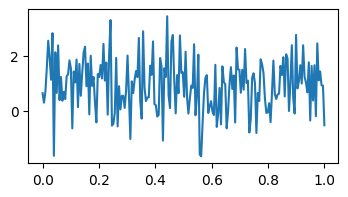

In [75]:
dgen.generate_data() #generate data
dgen.plot_data();


In [76]:
#Now extend the class
# Subclass that extends the DataGenAndPlot class
from scipy.signal import medfilt, savgol_filter, wiener

class DataGenExtended(DataGenAndPlot):
    def __init__(self):
        # Initialize the base class (Person)
        super().__init__()
        
    def plot_data_smoothed(self, method = 'medfilt', window_size = 7):
        """
        Input: method (str): method of smoothing, can be 'medfilt' for median filter, 'savgol' or 'wiener'
        Returns: fig: matplotlib figure object
        """

        if self.data_Y is None:
            raise ValueError("You don't have any data! You need to generate some by running generate_data() !")
            
        if method=='medfilt':
            data_smoothed = medfilt(self.data_Y, kernel_size = window_size)
        elif method=='savgol':
            data_smoothed = savgol_filter(self.data_Y, window_length=window_size, polyorder=2)
        elif method == 'wiener':
            data_smoothed = wiener(self.data_Y, mysize = window_size)
        
        fig = self.plot_data(self.data_X, data_smoothed)

        return fig
        

In [77]:
dgen_ext = DataGenExtended()

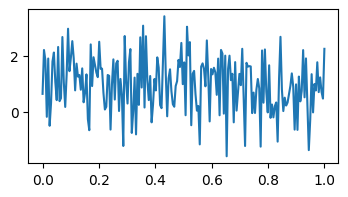

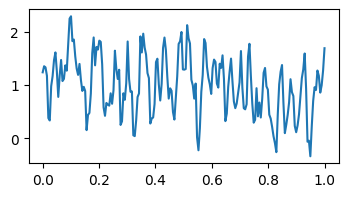

In [81]:
dgen_ext.generate_data()
dgen_ext.plot_data();
dgen_ext.plot_data_smoothed(method='savgol');

In [ ]:
from my_class import 